# HW 1

Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. The **objective** of this assignment is to help you familiarize w python packages related to machine learning, namely scikit-learn package.  

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

## Instructions

This assignment covers several aspects of KNN Classifier and performence evaluation we have covered in [introML](https://git.txstate.edu/ML/2023Fall/tree/main/practice/introML) module. eep the following in mind:
* Structure your [notebook](https://git.txstate.edu/ML/2023Fall/blob/master/tutorials/notebook-checklist.md) cells as sugested
* **Q** - QUESTION posted in a markdown cell
   * it explains the task in details
   * it is marked with **Q1**, ... **Q10** ...  
* **A** - Marks the location where you need to enter your answer below
   * it can be ```python code``` (more often) or markdown cell (less often)
   * it is marked with **A1**, ... **A10** ... and you enter your answers **below**
   * make sure the cell is running and produces no errors 
* Before you submit the HW: 
  * Make sure your notebook can always be rerun from top to bottom.

* Follow instructions given in canvas for homework submission.


## Tutorials

* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# 1. CLASSIFICATION USING KNN ALGORITHM

**Data**  is in the ../data/ folder, and datafile name is [heart.dat](../data/heart.dat)
**Keep** the relative path from **HW** folder to **data** folder in your submission e.g. you will access the file as [../data/heart.dat](../data/heart.dat)


**Q1**
use pandas to read ../data/heart.dat
* NOTE : use separator as space while reading this data
* Use column names from metadata in given order
* NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)


**A1**
Replace the ? mark with your answer

In [185]:
import pandas as pd

columns = [ 'age', 'sex', 'cp', 'restbp', 'chol', 'fastbs', 'restecg', 'maxhr', 'exang', 'oldpeak', 'slope', 'vcflour', 'thal', 'presence' ]

df = pd.read_csv( '../data/heart.dat', sep='\s', names=columns )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   restbp    270 non-null    float64
 4   chol      270 non-null    float64
 5   fastbs    270 non-null    float64
 6   restecg   270 non-null    float64
 7   maxhr     270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  vcflour   270 non-null    float64
 12  thal      270 non-null    float64
 13  presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


C:\Users\Isaac\AppData\Local\Temp\ipykernel_10716\197060135.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv( '../data/heart.dat', sep='\s', names=columns )


**Q2**
1. Have a look at head and tail of your data
* N.B: You can use .tail and .head methods
* N.B: Print both of them, if you just run ```without printing``` only output from last command will be printed
2. Let us view the size of dataset as well
* print data shape
3. Now let us see if there is some missing value
4. If there is any na values drop it

**N.B** You can add more cells as per your need.

**A2** Replace ??? with code in the code cell below

In [186]:
# Code goes below
df.head()

df.tail()

df.shape

df.isna()

df.dropna()

,age,sex,cp,restbp,chol,fastbs,restecg,maxhr,exang,oldpeak,slope,vcflour,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


**Q3** Now we will look deeper into the dataset
* Use pairplot from sns to plot this data frame
* See the statistics of the data by describing dataframe

**A3** Replace ??? with code in the code cell below

c:\Users\Isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


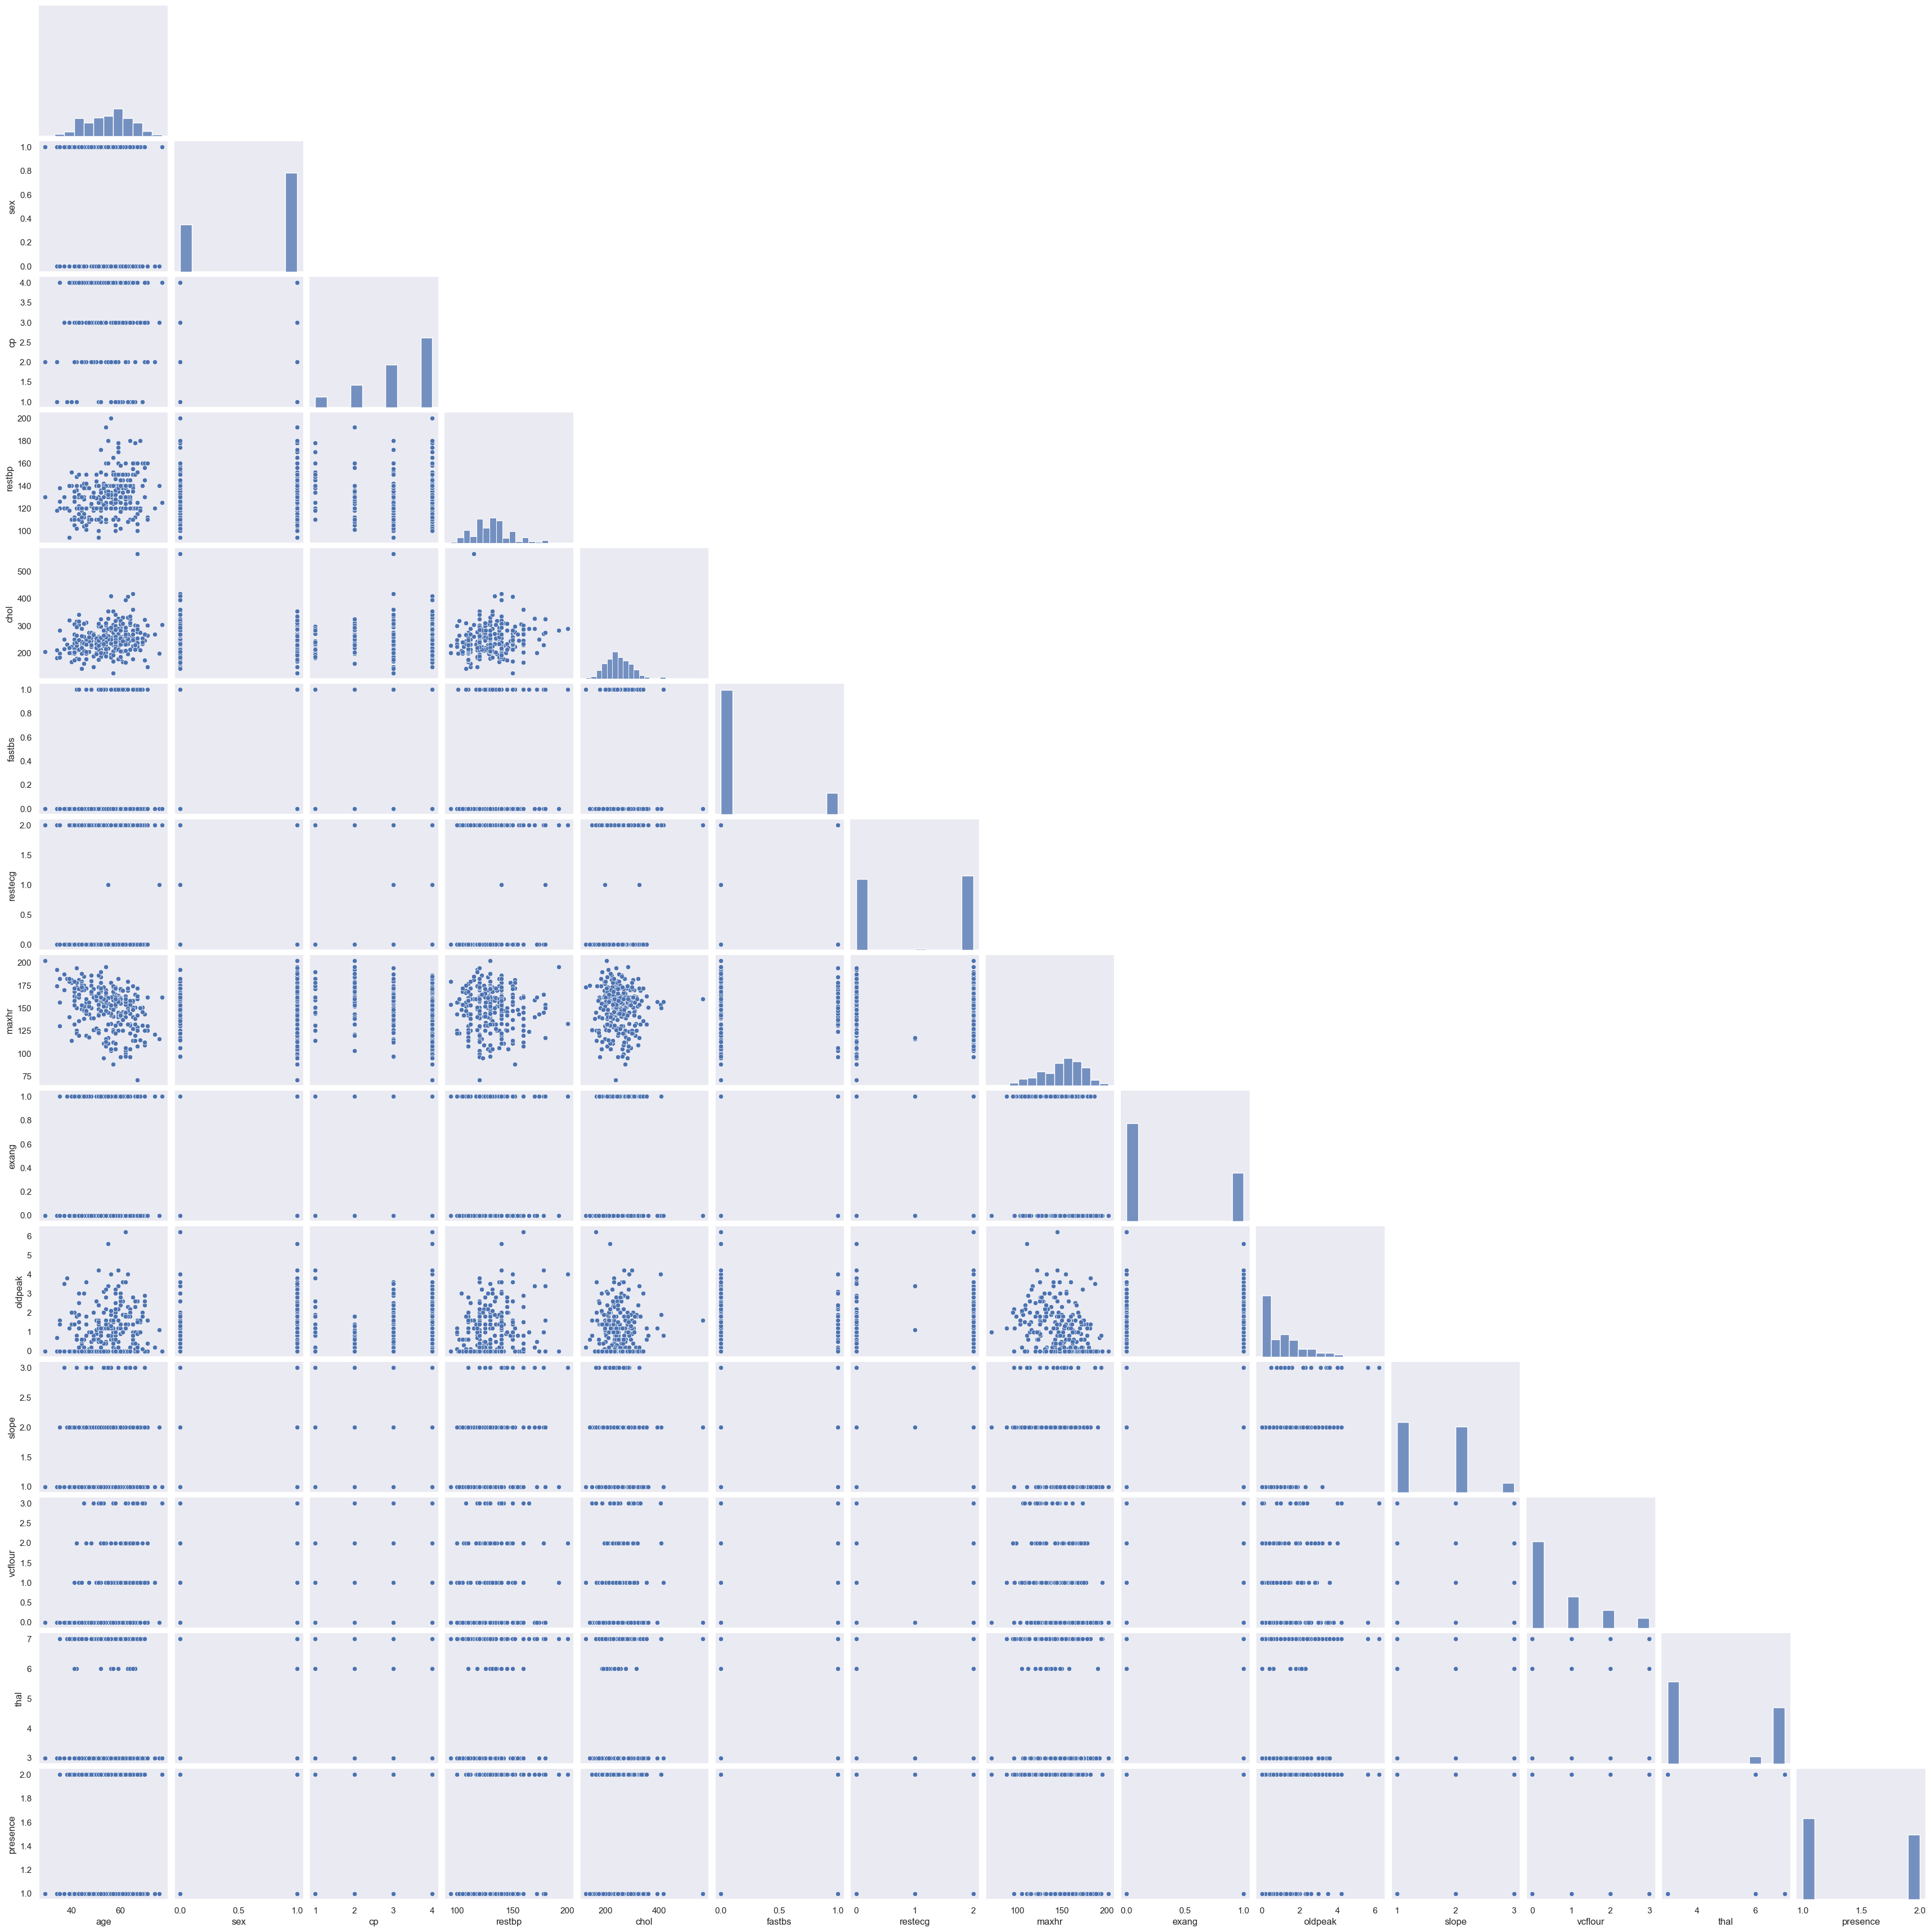

,age,sex,cp,restbp,chol,fastbs,restecg,maxhr,exang,oldpeak,slope,vcflour,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [187]:
import seaborn as sns

sns.set(style='dark', color_codes=True)
g = sns.pairplot( df, corner=True )

import matplotlib.pyplot as plt
plt.show( g )

#describe dataframe
df.describe()

**Q4** 

1. From the above pairplot what kind of relationship we can derive between age and heartrate?

**A4** Write your answer here......The relationship appears to be vaguely inverse, as the cluster of scatter points gradually decrease as age increases.

**Q5** If you go through metadata (heart.doc) (Attribute Information:) you will see that all data in our dataframe are not of same types.
* So we should deal them accordingly.  
* We don't have to do anything to 'real' data. However we have to deal with ordered data and nominal data  
* We only need to convert all nominal and ordered data to dummy variables 

**A5** Replace ??? with code in the code cell below


In [188]:
dummy_list = [ 'cp', 'restecg', 'slope', 'thal' ]
df = pd.get_dummies( df, columns=dummy_list, prefix=dummy_list, prefix_sep='-')
df.head()

,age,sex,restbp,chol,fastbs,maxhr,exang,oldpeak,vcflour,presence,...,cp-4.0,restecg-0.0,restecg-1.0,restecg-2.0,slope-1.0,slope-2.0,slope-3.0,thal-3.0,thal-6.0,thal-7.0
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,3.0,2,...,True,False,False,True,False,True,False,True,False,False
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,0.0,1,...,False,False,False,True,False,True,False,False,False,True
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,0.0,2,...,False,True,False,False,True,False,False,False,False,True
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,1.0,1,...,True,True,False,False,False,True,False,False,False,True
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1,...,False,False,False,True,True,False,False,True,False,False


## KNN Model from sklearn

**Q6** Get training data from the dataframe
1. Assign values of ```presence``` column to y, note you have to use .values method
2. Drop 'presence' column from data frame,
3. Assign df values to x

Split dataset into train and test data use train_test_split
1. Use stratify = y and test_size = 0.25 and random_state = 123
2. Create a KNN model using sklearn library, ```Initialize n_neighbors = 4```, ```(See the documenttaion for details)```
3. Fit the model with the train data 

**A6** Replace ??? with code in the code cell below

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Assign values of ```presence``` column to y, note you have to use .values method
y = df['presence'].values
# Drop 'presence' column from data frame,
df.drop('presence', axis=1)
# Assign df values to x
x = df.values
# View shape of x and y
x.shape, y.shape

# Use stratify = y and test_size = 0.25 and random_state = 123

xtrain, xtest, ytrain, ytest = train_test_split( x, y, stratify=y, test_size=0.25, random_state=123 )

# Create a KNN model using sklearn library, k=4 
knn = KNeighborsClassifier( n_neighbors=4 )

# Fit the model with the train data
knn.fit( xtrain, ytrain )

KNeighborsClassifier(n_neighbors=4)

**Q7** 
_Analysis_
* Predict xtest and view first 20 predicitons
* Compare prediction with real ytest 20 predictions
* Print the score with test data

The way we fit the dataset is not good  
_Normalization_
* rescale only real value columns
* For each column normalize ```df[col] as (x - mean) / standard_deviation```

**A7** Replace ??? with code in the code cell below

In [190]:
#  Predict xtest and view first 25 predicitons
print( knn.predict( xtest )[0:25] )

# Compare prediction with real ytest 25 predictions
print( ytest[0:25] )

# Print the score with test data
print( knn.score( xtest, ytest ) )

#rescale only real value columns
realcols = [ 'age', 'restbp', 'chol', 'maxhr', 'oldpeak', 'vcflour' ]

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in realcols:
  mean = df[col].mean()
  std = df[col].std()
  df[col] = ( df[col] - mean ) / std

[1 1 1 1 2 2 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1 2 1 1 1]
[1 2 2 2 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1]
0.6617647058823529


**Q8** Write the code to train new model using KNN classifier, k=4 (same as above)

**A8** Replace ??? with code in the code cell below

In [191]:
# update x
x = df.values

# Train test Split
xtrain, xtest, ytrain, ytest = train_test_split( x, y, stratify=y, test_size=0.25, random_state=123 )

# Model Initialization
knn = KNeighborsClassifier( n_neighbors=4 )

# Model fitting with training data
knn.fit( xtrain, ytrain )

# Now print score on test data
knn.score( xtest, ytest )

0.8382352941176471

**Q9** Lets analyze the difference between two modeling strategies (data normalization)  Compare score with and without data normalization process and explain

**A9**  
Normalization scores closer to 1 than non-normalized data.

**Q10** Now we will write a function that will initialize, fit and return score on test data for given values of k and Plot result  

1. Use values from 1 to 25(inclusive) and get score and plot as a line graph
* Hint : For advance method you can use map (recall functional programming from last exercise) or you can use simple loops

2. Finally you can print the best value of k by getting the index   
* N.B: Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more  
* You can use ```np.argmax()``` function  

3. Now define your best model as bestknn and print score

**A10** Write the code below (replace??)

[0.8382352941176471, 0.8088235294117647, 0.8676470588235294, 0.8382352941176471, 0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8529411764705882, 0.8823529411764706, 0.8676470588235294, 0.8970588235294118, 0.8529411764705882, 0.8823529411764706, 0.8676470588235294, 0.8676470588235294, 0.8529411764705882, 0.8676470588235294, 0.8529411764705882, 0.8676470588235294, 0.8529411764705882, 0.8676470588235294, 0.8529411764705882, 0.8676470588235294, 0.8529411764705882]
BESt VALUE OF K 11
[[35  3]
 [ 4 26]]


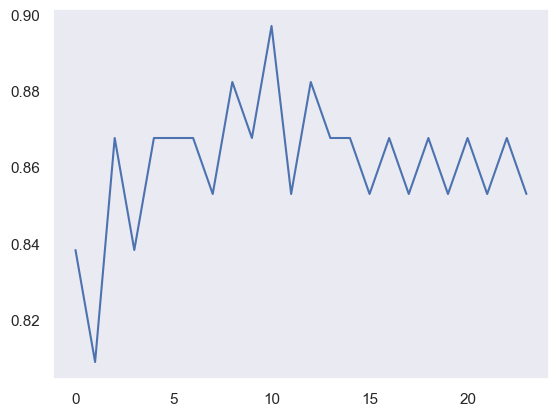

In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit( xtrain, ytrain )
  return knn.score( xtest, ytest )


result = [*map(lambda i:returnScore( i,xtrain, xtest, ytrain, ytest ), range( 1,25 ))]
print(result)
plt.plot(result)


print('BESt VALUE OF K',np.argmax(result) + 1 )


bestknn = KNeighborsClassifier( n_neighbors=np.argmax(result) + 1 )

bestknn.fit( xtrain, ytrain )
bestknn.score( xtest, ytest )


ypred = bestknn.predict( xtest )
matrix = confusion_matrix( ytest, ypred )
print(matrix)

**Q11** Now plot confusion matrix using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), for xtest data. Use the Best KNN model from the above question as the estimator. See [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 

**A11** Replace ??? with code in the code cell below

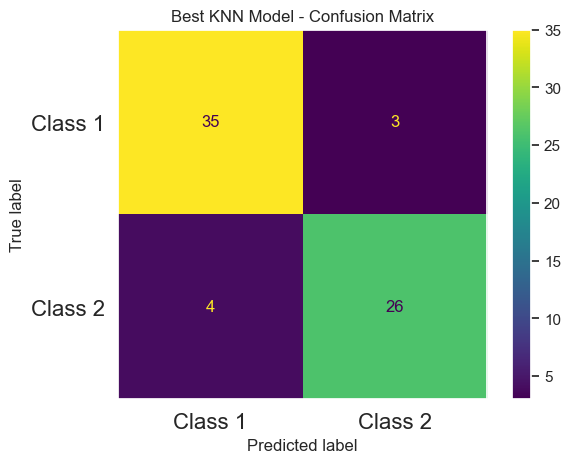

In [193]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator( bestknn, xtest, ytest )

plt.title("Best KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Q12:** 
1. Calculate the test MSE 
2. Get the score from the model using test data
3. Plot Precision-Recall Curve from the true & predicted test data (Use sklearn PrecisionRecallDisplay)

**A12** Replace ??? with code in the code cell below

Test mean squared error (MSE): 0.10
0.8970588235294118


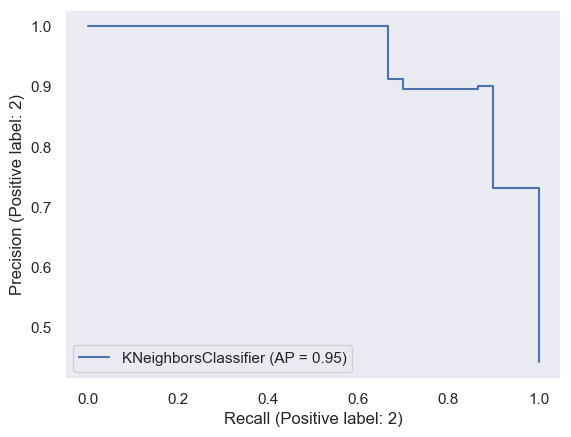

In [194]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

mse = mean_squared_error( ytest, ypred )          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(bestknn.score( xtest, ytest ))


PrecisionRecallDisplay.from_estimator( bestknn, xtest, ytest )
plt.show()

## Further reading

* [KNN model creation](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)
* [Example of KNN](https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb)

## Submission Instructions

 1. Run all cells in  `HW1.ipynb` and make sure there are no errors
 2. Print `HW1.ipynb` to pdf file
 3. Create a Folder HW0 and Upload `HW1.ipynb` and `HW1.pdf` files to your git repo allocated for this course e.g: https://git.txstate.edu/NetID/netid before the deadline. Make Sure Instructor and TA has access for the repo.
